# TBD for Fashion-MNIST

Toby Qin 14554445

# 1. Summary

A short 2-4 sentence summary of your project, identifying the dataset(s) you used, what classification methods you investigated, and 1 or 2 main conclusions from your investigations

# 2. Data Descriptions

A short 2-4 sentence summary of your project, identifying the dataset(s) you used, what classification methods you investigated, and 1 or 2 main conclusions from your investigations

In [1]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [2]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [3]:
print(X_train, len(X_train))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 60000


In [4]:
print(y_train, len(y_train))

[9 0 0 ... 3 0 5] 60000


In [5]:
print(X_test, len(X_test))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 10000


In [6]:
print(y_test, len(y_test))

[9 2 1 ... 8 1 5] 10000


# 3. Classifiers

List the classification algorithms/methods that you used in your project. For each classification method provide a brief 1 or 2 sentence description of the method (e.g., imagine your report is being read by a computer scientist who is not familiar with the details of different classifiers, but would like a high-level summary of the characteristics of each). Mention what the hyperparameters are for each method (if any) and for each hyperparameter the range of values (or settings, or architectures) that you investigated in your experiments. Mention also what software you used for each method, e.g., scikit-learn or some other package like PyTorch (for more advanced neural networks).

In [17]:
tr_sizes = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]

In [64]:
X_train, y_train = X_train[0:3000], y_train[0:3000]
X_test, y_test = X_test[0:3000], y_test[0:3000]

seed = 1234
np.random.seed(seed)  

KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(X_train, y_train)
    
#KNN.score(X_train, y_train, sample_weight=None)
#KNN.score(X_test, y_test, sample_weight=None)

KNeighborsClassifier(n_neighbors=10)

Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True, C=1, random_state=seed)
LR.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=1234, solver='liblinear')

Neural Network

In [125]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', n_iter_no_change=100, \
                        max_iter=100, learning_rate_init = 0.001, batch_size=110, random_state=seed)
MLP.fit(X_train, y_train)

C:\Users\DF_To\miniconda3\envs\cs178new\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=110, hidden_layer_sizes=(64,), max_iter=100,
              n_iter_no_change=100, random_state=1234)

Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DT = DecisionTreeClassifier(max_depth = 10, random_state=seed)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1234)


# 4. Experimental Setup

Describe briefly how you conducted your experimental methodology. What metrics did you look at? e..g, just classification accuracy (or error), or other metrics (such as AUC for binary classifiers). How did you partition up your data? we recommend that at the start of your project you set aside a test dataset that is only used once at the end of your project for final evaluation of models (this will be a realistic test of your method), e.g., 20% randomly selected examples, or the specified test set if the dataset has such.  The rest of the data (e.g., the remaining 80%) can be partitioned into a training and validation set (e.g., 75% of the 80% (i.e., 60% of the total) for training and 25% of the 80% (i.e, 20% of the total) for validation, where the validation set can be used for hyperparameter tuning. Be clear on how you selected hyparameters: feel free to use pseudocode for example to describe precisely what you did. In reporting machine learning experiments it is important that your experiments are reproducible (for others to independently validate and recreate what you did), and reproducibility implies clear documentation.

In [127]:
def compute_confusion_matrix(y, y_pred):
    
    unique_classes = set(y).union(set(y_pred))
    
    # Initializing everything to 0
    row = [0] * len(unique_classes)
    confusion_matrix = [list(row) for _ in range(len(unique_classes))]
    
    #  Constructing confusion matrix
    for i in range(len(y)):
        confusion_matrix[y[i]][y_pred[i]] += 1
    
    confusion_matrix = np.array(confusion_matrix)
    
    return confusion_matrix

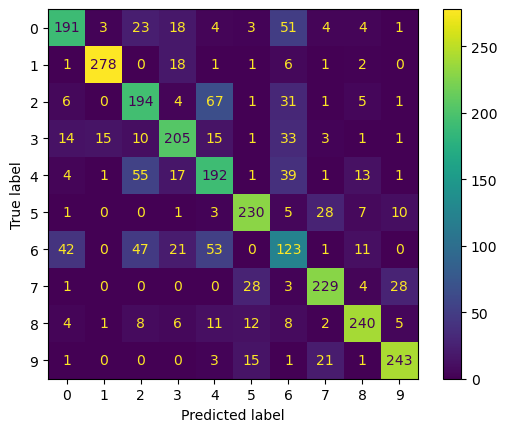

In [128]:
y_predict = KNN.predict(X_test)
confusion_matrix_KNN = compute_confusion_matrix(y_test, y_predict)
confusion_matrixc_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN)
confusion_matrix_display.plot()

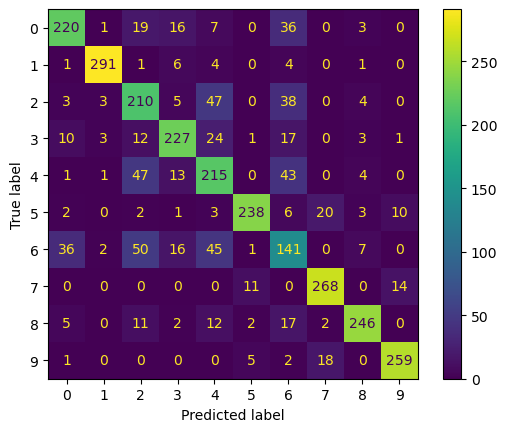

In [129]:
y_predict = LR.predict(X_test)
confusion_matrix_LR = compute_confusion_matrix(y_test, y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_LR)
confusion_matrix_display.plot()

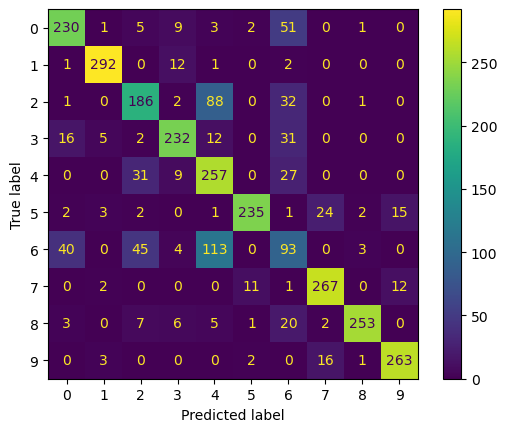

In [130]:
y_predict = MLP.predict(X_test)
confusion_matrix_MLP = compute_confusion_matrix(y_test, y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_MLP)
confusion_matrix_display.plot()

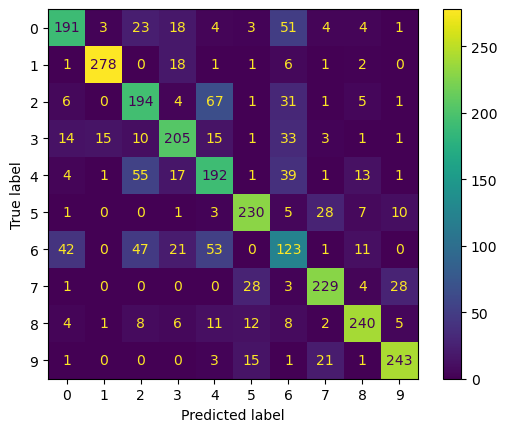

In [131]:
y_predict = DT.predict(X_test)
confusion_matrix_DT = compute_confusion_matrix(y_test, y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_DT)
confusion_matrix_display.plot()

In [132]:
from collections import defaultdict

In [133]:
def confusion_matrix_mistakes(confusion_matrix):
    frequent_mistakes = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], \
                         6:[], 7:[], 8:[], 9:[]}
    
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i])):
            if confusion_matrix[i][j] > 50 and i != j:
                frequent_mistakes[i].append(j)
    
    return frequent_mistakes

In [138]:
confusion_matrix_KNN

array([[243,   1,  15,   9,   4,   0,  27,   1,   2,   0],
       [  6, 291,   2,   8,   1,   0,   0,   0,   0,   0],
       [  6,   0, 220,   1,  56,   0,  27,   0,   0,   0],
       [ 17,   4,   5, 243,  17,   0,  11,   0,   1,   0],
       [  0,   1,  43,  13, 224,   0,  42,   0,   1,   0],
       [  1,   0,   1,   1,   0, 207,   2,  43,   1,  29],
       [ 65,   0,  46,   4,  35,   0, 143,   1,   4,   0],
       [  0,   0,   0,   0,   0,   2,   0, 270,   0,  21],
       [  0,   1,  11,   1,   7,   2,   6,   7, 262,   0],
       [  1,   0,   0,   0,   0,   0,   0,  14,   0, 270]])

In [139]:
confusion_matrix_LR

array([[220,   1,  19,  16,   7,   0,  36,   0,   3,   0],
       [  1, 291,   1,   6,   4,   0,   4,   0,   1,   0],
       [  3,   3, 210,   5,  47,   0,  38,   0,   4,   0],
       [ 10,   3,  12, 227,  24,   1,  17,   0,   3,   1],
       [  1,   1,  47,  13, 215,   0,  43,   0,   4,   0],
       [  2,   0,   2,   1,   3, 238,   6,  20,   3,  10],
       [ 36,   2,  50,  16,  45,   1, 141,   0,   7,   0],
       [  0,   0,   0,   0,   0,  11,   0, 268,   0,  14],
       [  5,   0,  11,   2,  12,   2,  17,   2, 246,   0],
       [  1,   0,   0,   0,   0,   5,   2,  18,   0, 259]])

In [134]:
confusion_matrix_mistakes(confusion_matrix_KNN)

{0: [], 1: [], 2: [4], 3: [], 4: [], 5: [], 6: [0], 7: [], 8: [], 9: []}

In [135]:
confusion_matrix_mistakes(confusion_matrix_LR)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [136]:
confusion_matrix_mistakes(confusion_matrix_MLP)

{0: [6], 1: [], 2: [4], 3: [], 4: [], 5: [], 6: [4], 7: [], 8: [], 9: []}

In [137]:
confusion_matrix_mistakes(confusion_matrix_DT)

{0: [6], 1: [], 2: [4], 3: [], 4: [2], 5: [], 6: [4], 7: [], 8: [], 9: []}


# 5. Experimental Results

Summarize the results that you obtained on the test data for each of your classifiers and for each of the metrics that you used, and write a brief interpretation of the overall results. Provide the results as a table or as a figure (e.g., bar-chart). Feel free to add additional information, such as comparing performance of each model on test data to its performance on training data. Feel free to also additional experimental results (such how accuracy for certain classifiers varied if they were provided with less training data (i.e,. "learning curves"), or how accuracy varied as a function of regularization) - this level of detail can go in an Appendix if you don't have space in the main report. You could also analyze if classifiers make the same errors: e.g., if classifier A has an error rate of 5% and classifier B has an error rate of 10%, are all (or most) of classifier A's error included in classifier B's errors?

# 6. Insights

Write a brief summary of what you learned by doing this project. For example did any of the results surprise you? You could also do an "error analysis" of the results by looking at the examples where the classifier made an error: are the examples that the classifier misclassifies also hard for humans to classify? and if so, what makes these examples difficult? Feel free to speculate on what you think the strengths and weaknesses of using any of the machine learning methods (that you investigated) on a more realistic version of the dataset(s) you worked with, e.g., putting the classifier on a real camera for object recognition, or using it in a real-world medical setting.

# 7. Contributions

For each team member provide a 1 to 2 sentence description of how that team member contributed to the project (e.g., it could be in terms of contributions to the different aspects of your project as described in the section headings above). While there will inevitably be a fair bit of overlap in terms of what team members work on (and that is fine) please try to identify at least 1 or 2 aspects of the project, for each team member , where they did the most work relative to the rest of the team.

Toby Qin: Summary, Date Descriptions, Classifiers